In [64]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [65]:
index=yf.download("^NSEBANK", start="2010-01-01", end="2023-06-19")

[*********************100%***********************]  1 of 1 completed


In [66]:
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3031 entries, 2010-01-04 to 2023-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3031 non-null   float64
 1   High       3031 non-null   float64
 2   Low        3031 non-null   float64
 3   Close      3031 non-null   float64
 4   Adj Close  3031 non-null   float64
 5   Volume     3031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.8 KB


In [67]:
index.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-12,44035.199219,44124.949219,43874.050781,43944.199219,43944.199219,91400
2023-06-13,43889.699219,44138.148438,43889.699219,44079.851562,44079.851562,160000
2023-06-14,44181.648438,44212.351562,43956.148438,43988.000000,43988.000000,154600
2023-06-15,44054.351562,44077.449219,43397.500000,43443.601562,43443.601562,228200
2023-06-16,43583.351562,44083.250000,43536.949219,43938.148438,43938.148438,234700


In [68]:
plt.style.use("seaborn")

C:\Users\KS401\AppData\Local\Temp\ipykernel_10184\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [69]:
close = index.loc[:, "Close"].copy()

<function matplotlib.pyplot.show(close=None, block=None)>

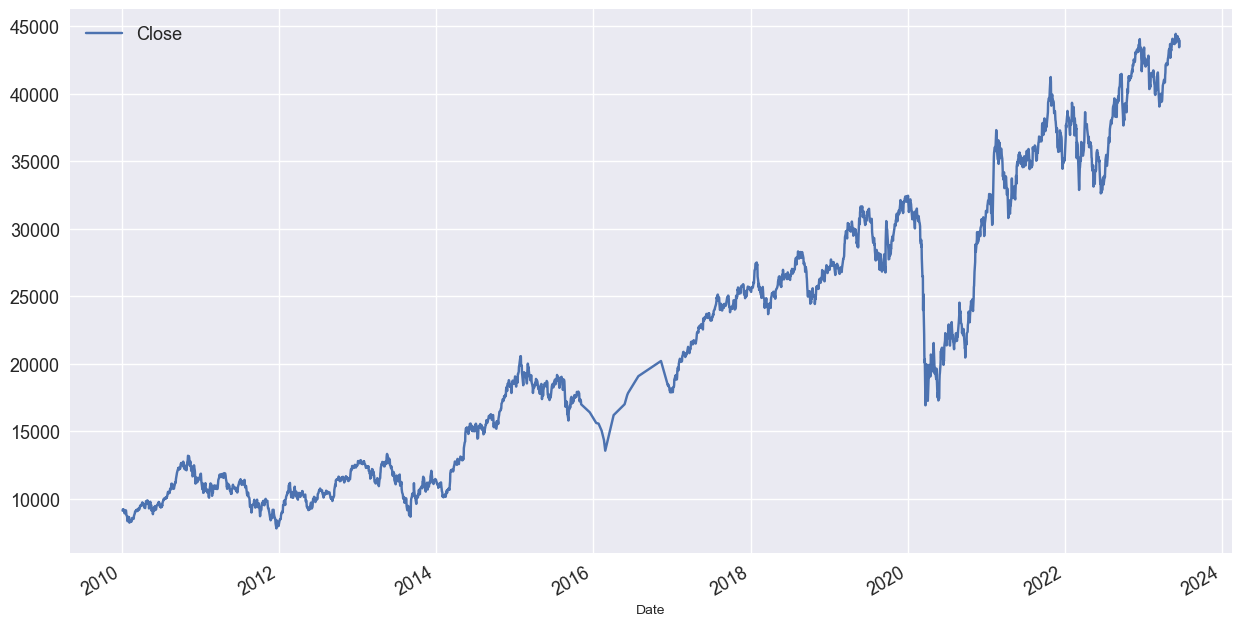

In [70]:
close.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show

In [71]:
bnifty = close.copy().to_frame()

In [72]:
bnifty.head()

,Close
Date,
2010-01-04,9112.349609
2010-01-05,9192.150391
2010-01-06,9223.000000
2010-01-07,9192.950195
2010-01-08,9160.700195


In [73]:
bnifty.shift(periods=1)

,Close
Date,
2010-01-04,NaN
2010-01-05,9112.349609
2010-01-06,9192.150391
2010-01-07,9223.000000
2010-01-08,9192.950195
...,...
2023-06-12,43989.000000
2023-06-13,43944.199219
2023-06-14,44079.851562


In [74]:
bnifty["prev_day"] = bnifty.shift(periods=1)

In [75]:
bnifty.head()

,Close,prev_day
Date,,
2010-01-04,9112.349609,NaN
2010-01-05,9192.150391,9112.349609
2010-01-06,9223.000000,9192.150391
2010-01-07,9192.950195,9223.000000
2010-01-08,9160.700195,9192.950195


In [76]:
bnifty["diff"] = bnifty["Close"] - bnifty["prev_day"]

In [77]:
bnifty.head()

,Close,prev_day,diff
Date,,,
2010-01-04,9112.349609,NaN,NaN
2010-01-05,9192.150391,9112.349609,79.800781
2010-01-06,9223.000000,9192.150391,30.849609
2010-01-07,9192.950195,9223.000000,-30.049805
2010-01-08,9160.700195,9192.950195,-32.250000


In [78]:
bnifty["%change"] = (bnifty["Close"]/bnifty["prev_day"]-1)*100

In [79]:
bnifty.head()

,Close,prev_day,diff,%change
Date,,,,
2010-01-04,9112.349609,NaN,NaN,NaN
2010-01-05,9192.150391,9112.349609,79.800781,0.875743
2010-01-06,9223.000000,9192.150391,30.849609,0.335608
2010-01-07,9192.950195,9223.000000,-30.049805,-0.325814
2010-01-08,9160.700195,9192.950195,-32.250000,-0.350812


In [80]:
bnifty["diff2"] = bnifty.Close.diff(periods=1)

In [81]:
bnifty

,Close,prev_day,diff,%change,diff2
Date,,,,,
2010-01-04,9112.349609,NaN,NaN,NaN,NaN
2010-01-05,9192.150391,9112.349609,79.800781,0.875743,79.800781
2010-01-06,9223.000000,9192.150391,30.849609,0.335608,30.849609
2010-01-07,9192.950195,9223.000000,-30.049805,-0.325814,-30.049805
2010-01-08,9160.700195,9192.950195,-32.250000,-0.350812,-32.250000
...,...,...,...,...,...
2023-06-12,43944.199219,43989.000000,-44.800781,-0.101845,-44.800781
2023-06-13,44079.851562,43944.199219,135.652344,0.308692,135.652344
2023-06-14,43988.000000,44079.851562,-91.851562,-0.208375,-91.851562


In [82]:
bnifty["%change2"] = bnifty.Close.pct_change(periods = 1).mul(100)

In [83]:
bnifty

,Close,prev_day,diff,%change,diff2,%change2
Date,,,,,,
2010-01-04,9112.349609,NaN,NaN,NaN,NaN,NaN
2010-01-05,9192.150391,9112.349609,79.800781,0.875743,79.800781,0.875743
2010-01-06,9223.000000,9192.150391,30.849609,0.335608,30.849609,0.335608
2010-01-07,9192.950195,9223.000000,-30.049805,-0.325814,-30.049805,-0.325814
2010-01-08,9160.700195,9192.950195,-32.250000,-0.350812,-32.250000,-0.350812
...,...,...,...,...,...,...
2023-06-12,43944.199219,43989.000000,-44.800781,-0.101845,-44.800781,-0.101845
2023-06-13,44079.851562,43944.199219,135.652344,0.308692,135.652344,0.308692
2023-06-14,43988.000000,44079.851562,-91.851562,-0.208375,-91.851562,-0.208375


In [99]:
ret = bnifty["%change"].div(100).dropna()

In [100]:
ret.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3030 entries, 2010-01-05 to 2023-06-16
Series name: %change
Non-Null Count  Dtype  
--------------  -----  
3030 non-null   float64
dtypes: float64(1)
memory usage: 47.3 KB


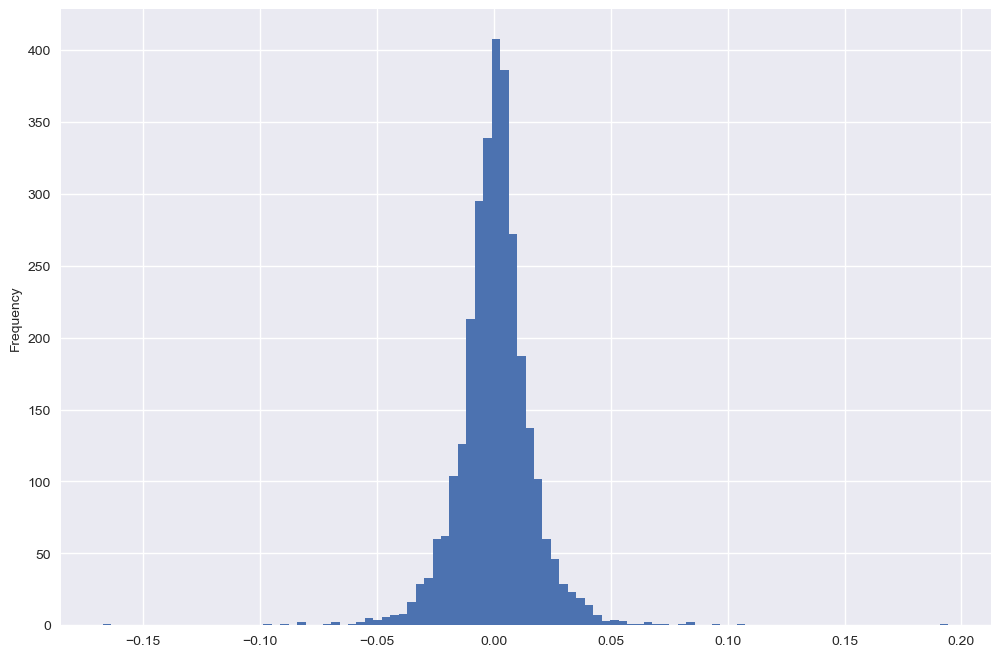

In [101]:
ret.plot(kind = "hist", figsize = (12,8), bins = 100)
plt.show()

In [102]:
daily_mean_return = ret.mean()
daily_mean_return

0.0006498549054970378

In [103]:
daily_var_return = ret.var()
daily_var_return

0.0002614291527991654

In [104]:
import numpy as np
daily_std_return = np.sqrt(daily_var_return)
daily_std_return

0.016168770911827696

In [105]:
ret.std()

0.016168770911827696

In [106]:
ann_mean_return = ret.mean()*248
ann_mean_return

0.16116401656326537

In [107]:
ann_var_return = daily_var_return*248
ann_var_return

0.06483442989419301

In [109]:
ann_std_return = np.sqrt(ann_var_return)
ann_std_return

0.25462605894564877

In [111]:
close

Date
2010-01-04     9112.349609
2010-01-05     9192.150391
2010-01-06     9223.000000
2010-01-07     9192.950195
2010-01-08     9160.700195
                  ...     
2023-06-12    43944.199219
2023-06-13    44079.851562
2023-06-14    43988.000000
2023-06-15    43443.601562
2023-06-16    43938.148438
Name: Close, Length: 3031, dtype: float64

In [112]:
close.head()

Date
2010-01-04    9112.349609
2010-01-05    9192.150391
2010-01-06    9223.000000
2010-01-07    9192.950195
2010-01-08    9160.700195
Name: Close, dtype: float64

In [113]:
bnifty.head()

,Close,prev_day,diff,%change,diff2,%change2
Date,,,,,,
2010-01-04,9112.349609,NaN,NaN,NaN,NaN,NaN
2010-01-05,9192.150391,9112.349609,79.800781,0.875743,79.800781,0.875743
2010-01-06,9223.000000,9192.150391,30.849609,0.335608,30.849609,0.335608
2010-01-07,9192.950195,9223.000000,-30.049805,-0.325814,-30.049805,-0.325814
2010-01-08,9160.700195,9192.950195,-32.250000,-0.350812,-32.250000,-0.350812


In [135]:
SMA = close.copy().to_frame()
SMA["SMA5"] = SMA.Close.rolling(window=5).mean()
SMA["SMA25"] = SMA.Close.rolling(window=25).mean()
SMA["SMA50"] = SMA.Close.rolling(window=50).mean()
SMA["SMA100"] = SMA.Close.rolling(window=100).mean()

In [136]:
SMA.dropna()

,Close,SMA5,SMA25,SMA50,SMA100
Date,,,,,
2010-05-31,9363.700195,9162.819922,9464.413906,9477.882930,9139.290449
2010-06-01,9119.049805,9216.279883,9438.917891,9475.217930,9139.357451
2010-06-02,9192.450195,9249.250000,9421.219883,9473.650938,9139.360449
2010-06-03,9387.700195,9275.100000,9404.575898,9477.665937,9141.007451
2010-06-04,9455.950195,9303.770117,9387.999922,9482.326934,9143.637451
...,...,...,...,...,...
2023-06-12,43944.199219,44073.660156,43899.417969,42961.211797,41916.667422
2023-06-13,44079.851562,44056.720313,43934.686094,43051.450859,41933.753438
2023-06-14,43988.000000,43999.260156,43960.964063,43133.007891,41951.957930


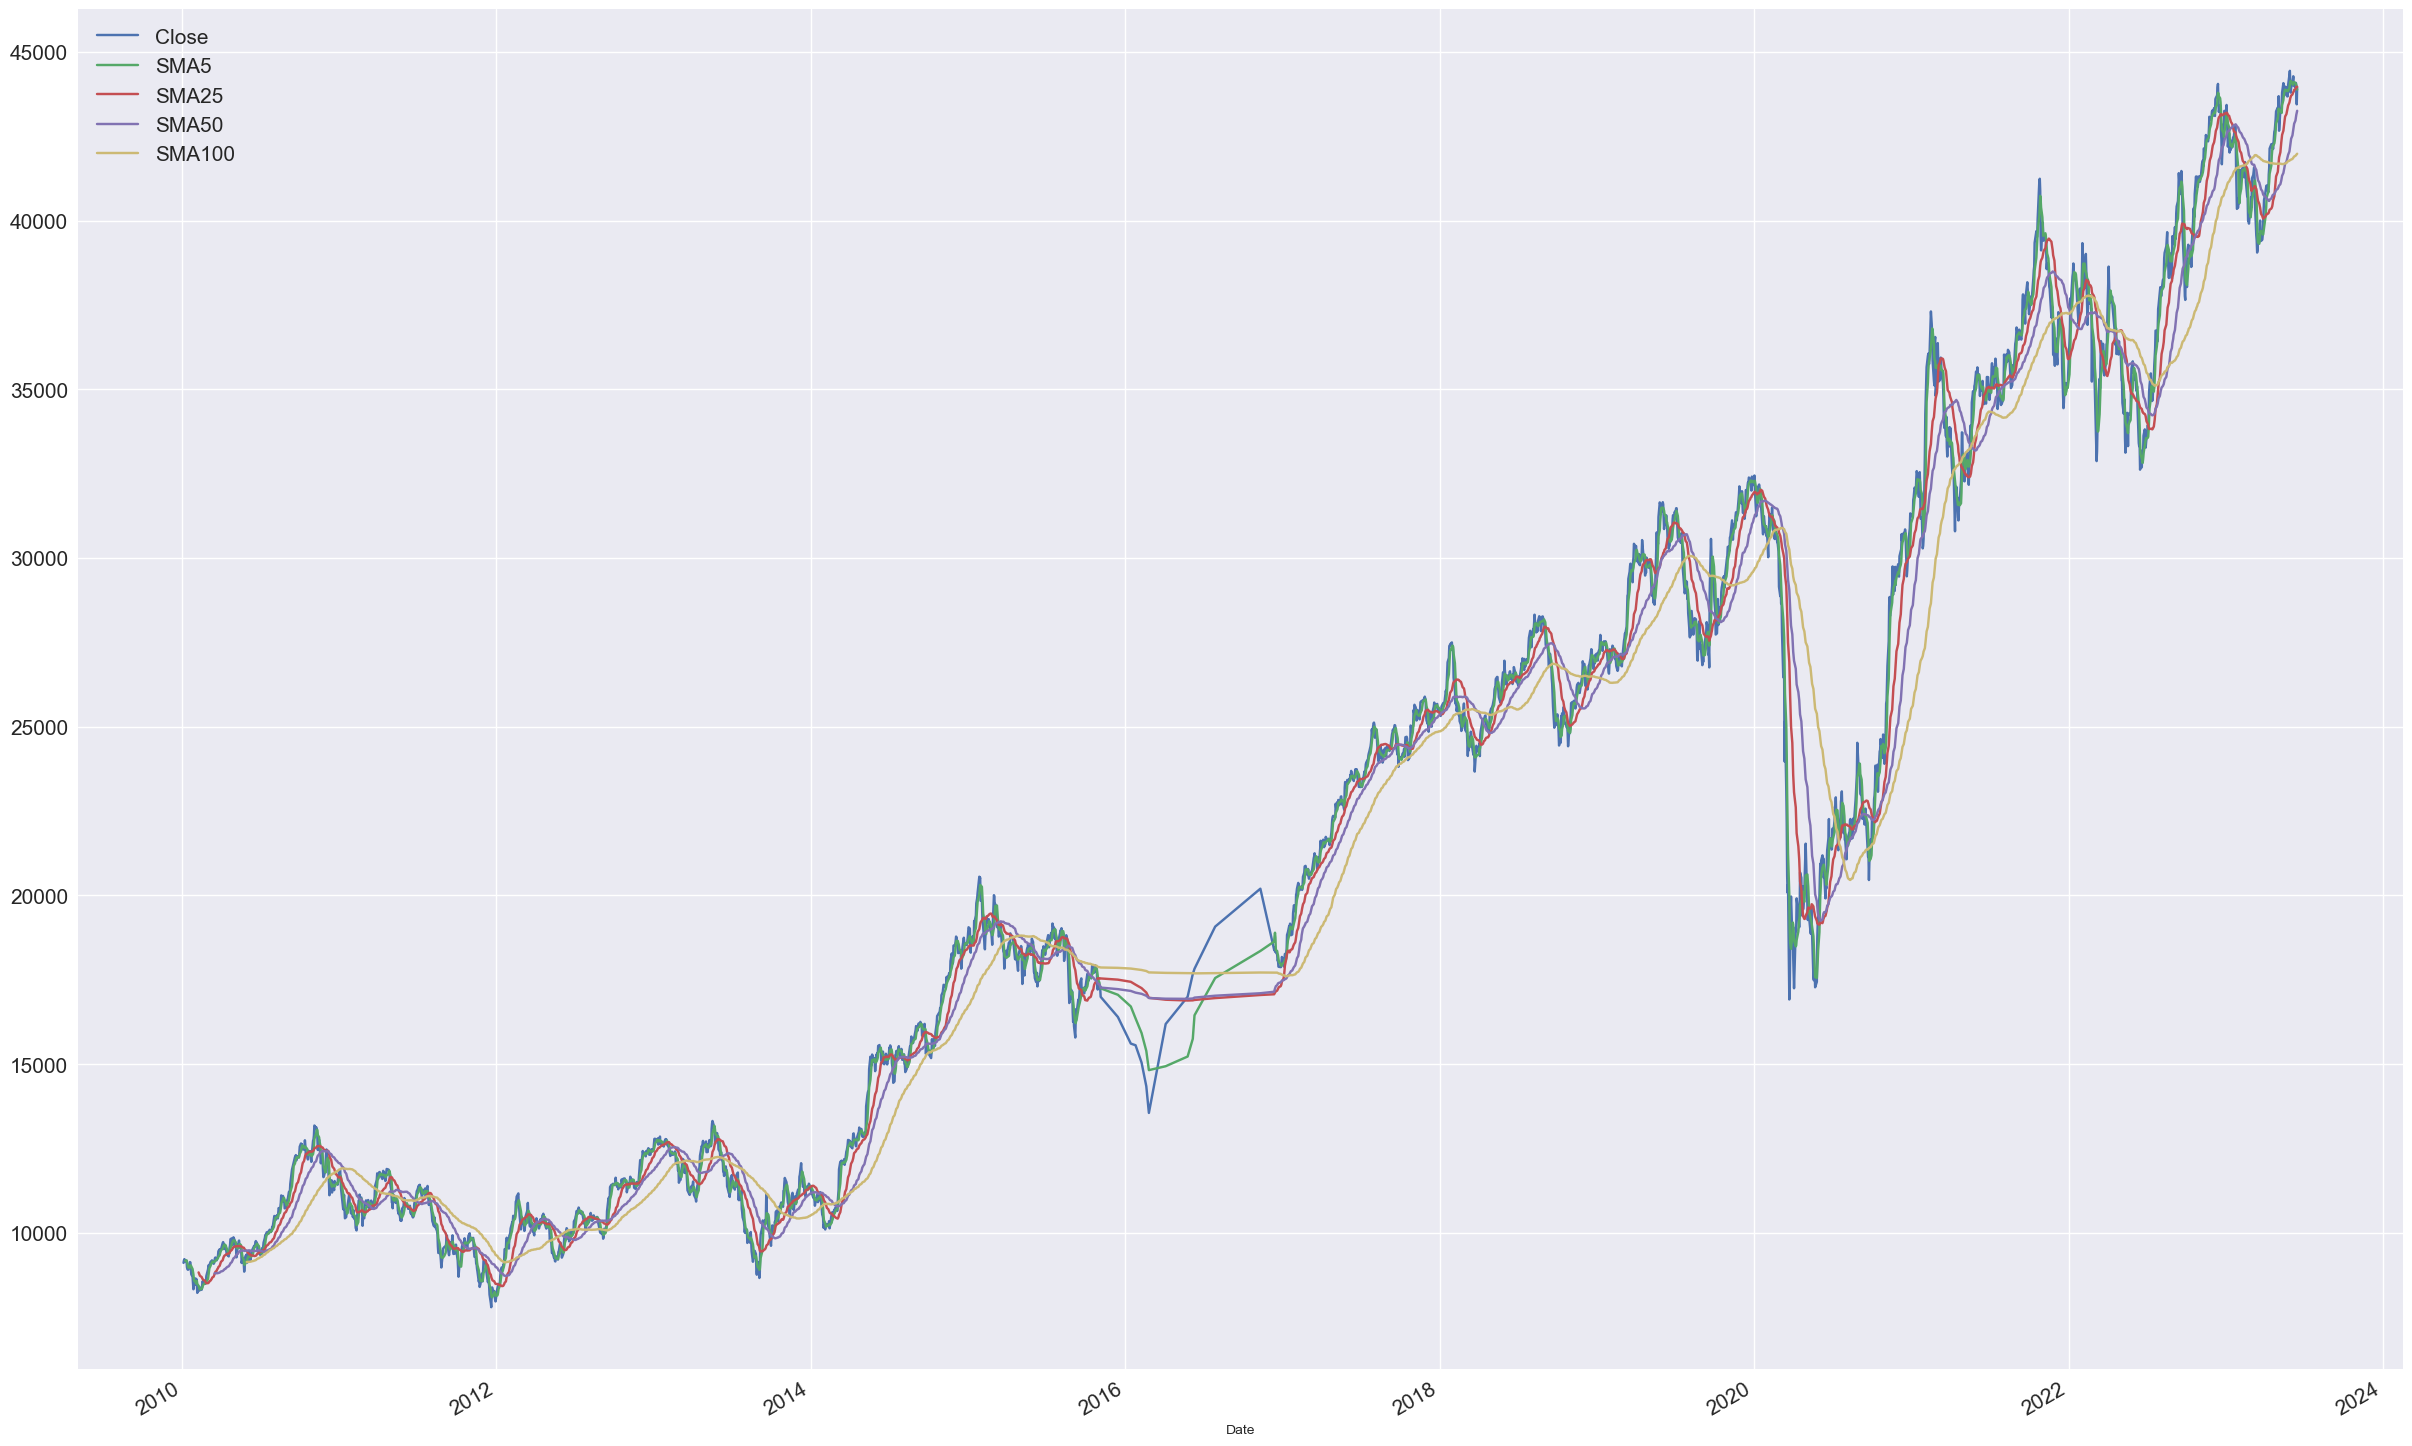

In [137]:
SMA.plot(figsize=(30,20), fontsize = 15)
plt.legend(loc="upper left", fontsize = 15)
plt.show()

In [138]:
EMA = close.copy().to_frame()
EMA["EMA5"] = EMA.Close.ewm(span=5).mean()
EMA["EMA25"] = EMA.Close.ewm(span=25).mean()
EMA["EMA50"] = EMA.Close.ewm(span=50).mean()
EMA["EMA100"] = EMA.Close.ewm(span=100).mean()

In [139]:
EMA.dropna()

,Close,EMA5,EMA25,EMA50,EMA100
Date,,,,,
2010-01-04,9112.349609,9112.349609,9112.349609,9112.349609,9112.349609
2010-01-05,9192.150391,9160.230078,9153.846016,9153.048008,9152.649004
2010-01-06,9223.000000,9189.963199,9178.765042,9177.304125,9176.569890
2010-01-07,9192.950195,9191.203951,9182.747762,9181.453399,9180.788630
2010-01-08,9160.700195,9179.493979,9177.605712,9176.964203,9176.608645
...,...,...,...,...,...
2023-06-12,43944.199219,44020.358588,43746.584143,43125.562702,42371.879390
2023-06-13,44079.851562,44040.189580,43772.220099,43162.985795,42405.700621
2023-06-14,43988.000000,44022.793053,43788.818553,43195.339293,42437.033282


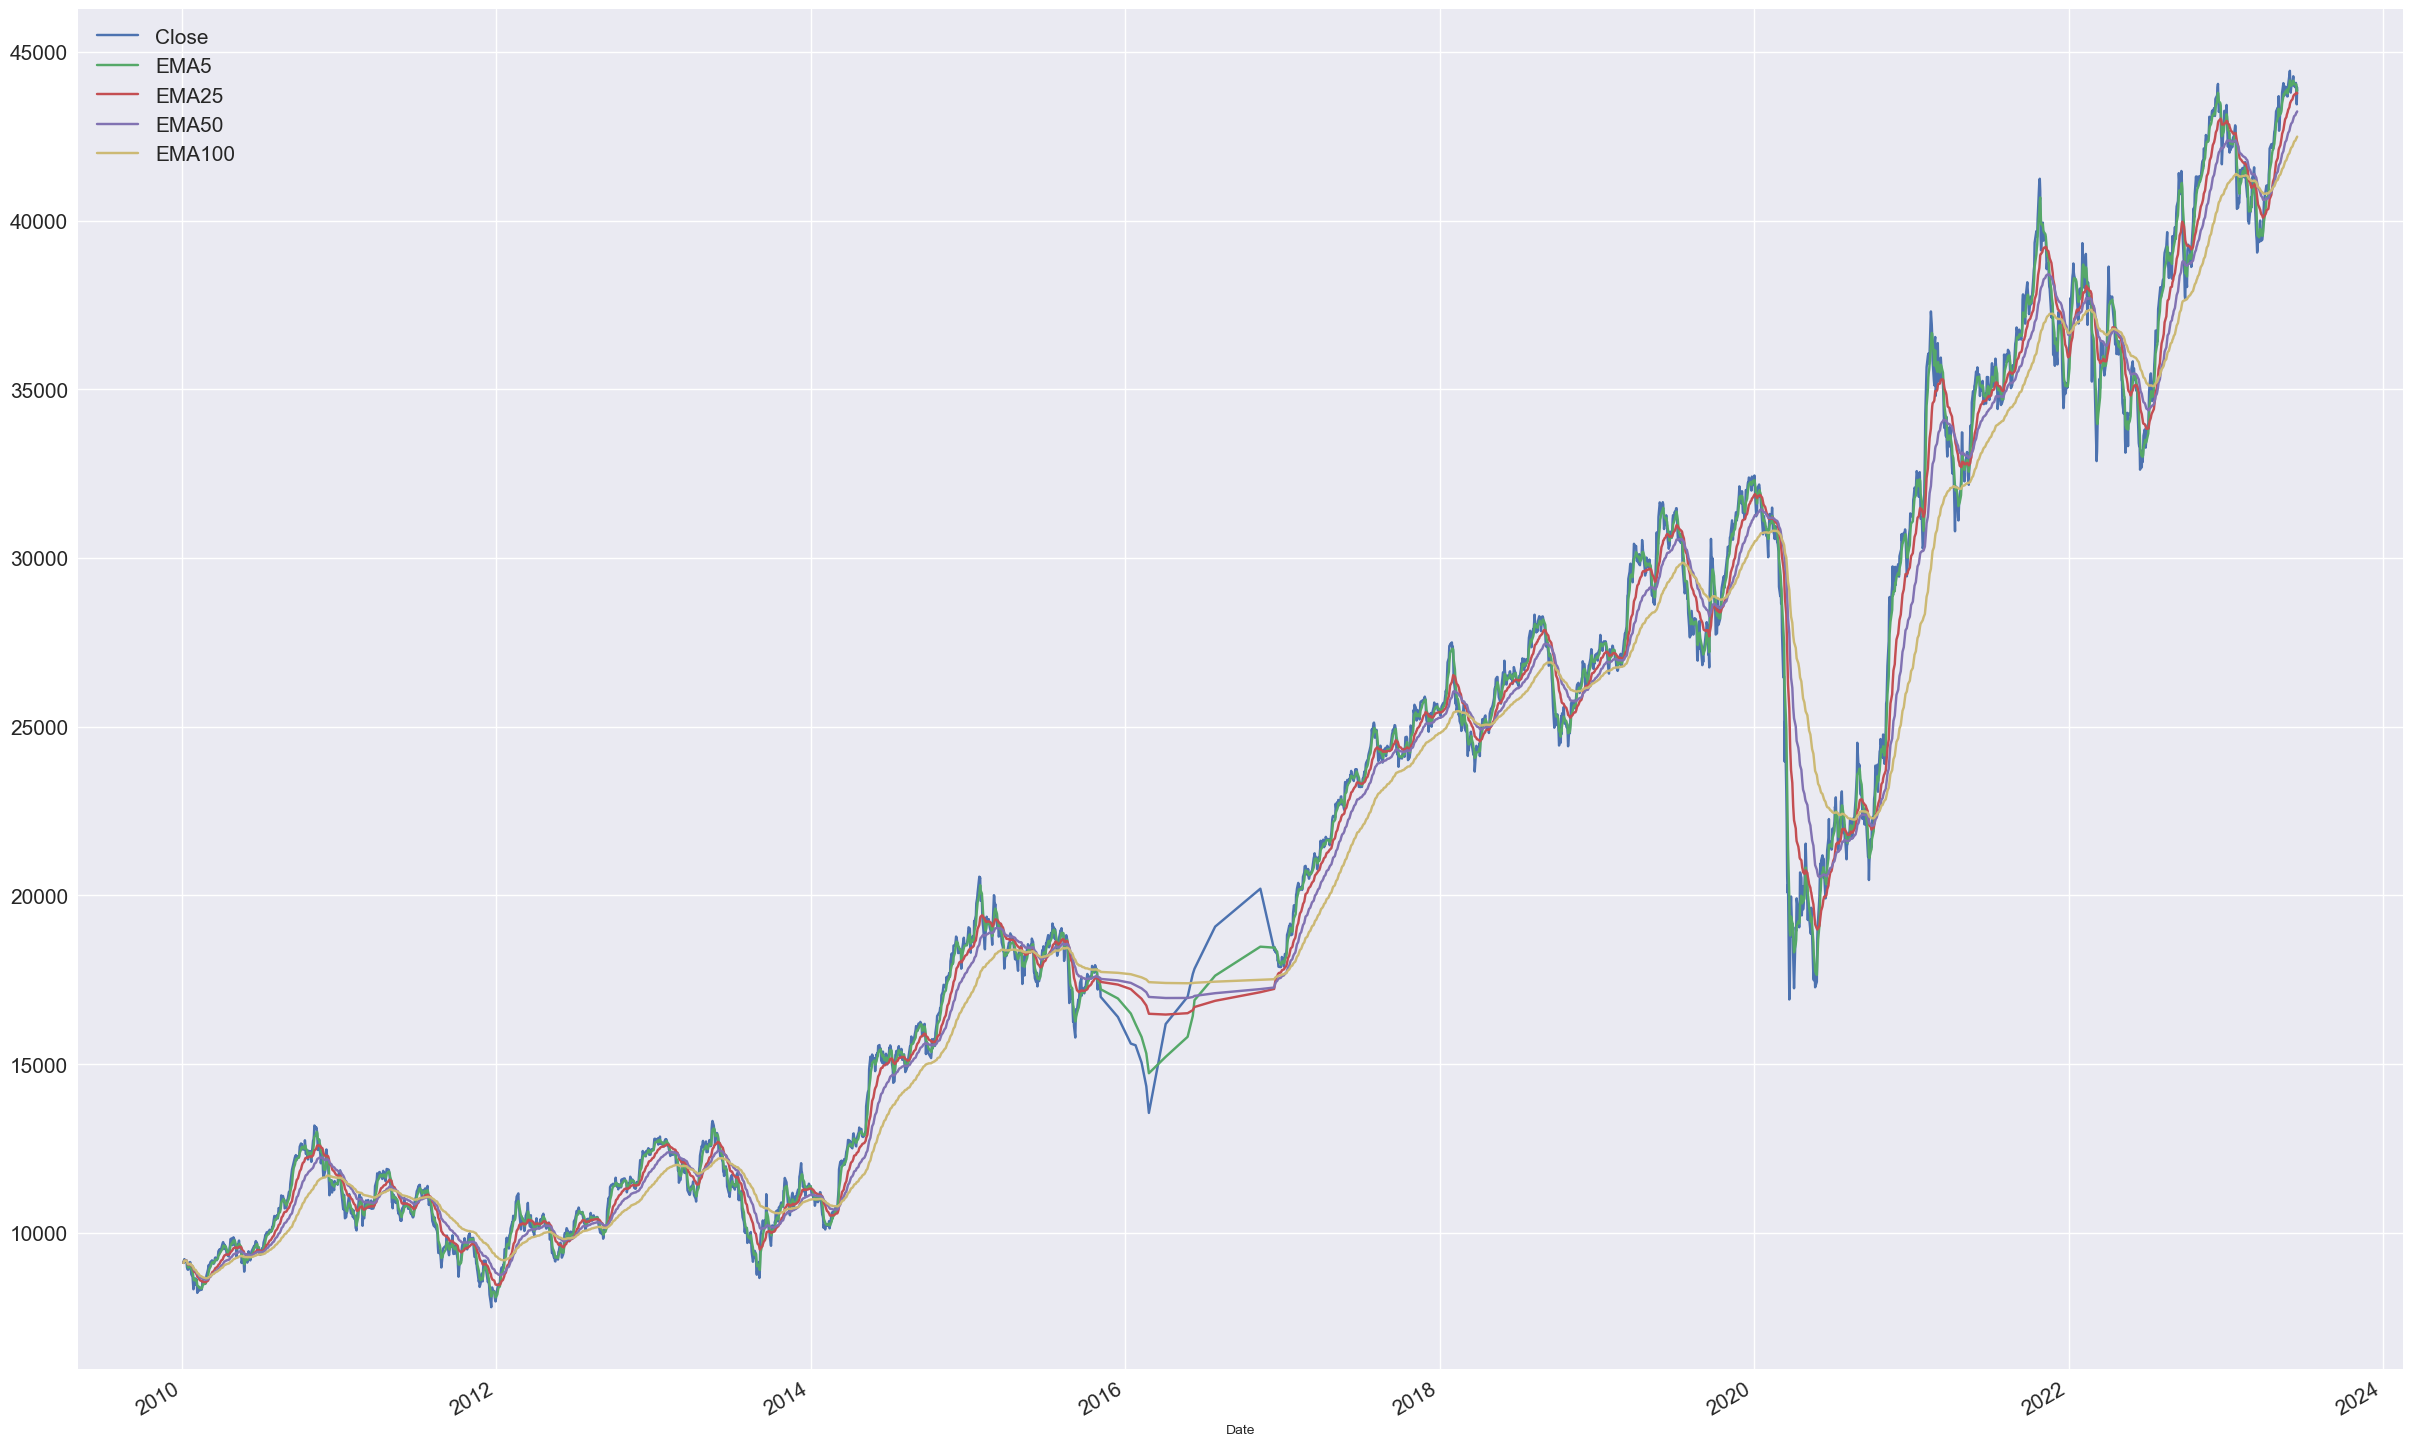

In [140]:
EMA.plot(figsize=(30,20), fontsize = 15)
plt.legend(loc="upper left", fontsize = 15)
plt.show()

In [141]:
MA = close.copy().to_frame()

In [144]:
MA["SMA100"] = SMA["SMA100"]
MA["EMA100"] = EMA["EMA100"]

In [146]:
MA.dropna()

,Close,SMA100,EMA100
Date,,,
2010-05-31,9363.700195,9139.290449,9284.795572
2010-06-01,9119.049805,9139.357451,9281.011538
2010-06-02,9192.450195,9139.360449,9278.995757
2010-06-03,9387.700195,9141.007451,9281.462723
2010-06-04,9455.950195,9143.637451,9285.411166
...,...,...,...
2023-06-12,43944.199219,41916.667422,42371.879390
2023-06-13,44079.851562,41933.753438,42405.700621
2023-06-14,43988.000000,41951.957930,42437.033282


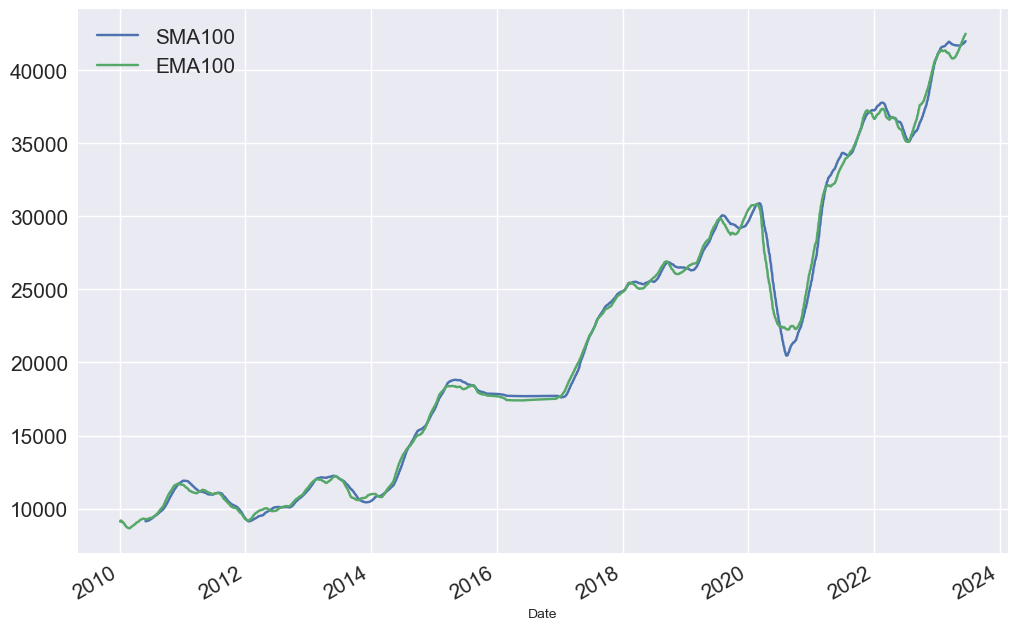

In [152]:
MA.iloc[:,-2:].plot(figsize=(12,8), fontsize = 15)
plt.legend(loc="upper left", fontsize = 15)
plt.show()

10
